# CS 4048 – Data Science
# Final Project
## Introduction
Imtiaz Mall, a renowned department store chain, is experiencing declining sales and a
significant number of non-recurring customers in its electronics section. To address this
challenge, you, the newly appointed Senior Data Scientist, have been tasked with conducting a
comprehensive analysis of the electronics section data and developing data-driven strategies for
customer retention and sales growth. This project focuses on the initial steps of this analysis,
specifically exploring the data through various techniques and comparing the results of three
clustering algorithms: K-Means, DBSCAN, and K-Means++.



# Module : Data Acquisition and Preprocessing

## 1. Data Acquisition:

First of all we import the libraries such as pandas, json, numpy and read data from file.

In [121]:
import pandas as pd
import json
import numpy as np


df = pd.read_json('electronics.json')
df



,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,Hidden,8b6ffec8-de54-445c-90d0-1399858b2e16,Hidden,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,Hidden,98,8,7,Low,03,2000,


## 2. Data Cleaning:

The data cleaning process involves several key steps to ensure the reliability and consistency of the dataset. Now we start data cleaning process we have dataset which have some empty values and Hidden values in data. First we replace hidden values in data with NAN. and then we replace empty values with NAN.

In [122]:
df.replace('Hidden', np.nan, inplace=True)
df.replace("", np.nan, inplace=True)
df


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,NaN,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,NaN,8b6ffec8-de54-445c-90d0-1399858b2e16,NaN,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,NaN,98,8,7,Low,03,2000,NaN


#### Now we check the total  null values in all columns

In [124]:
null_values_count = df.isnull().sum()

print("Null Values per Column:")
print(null_values_count)

Null Values per Column:
Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64


In [137]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

mean_age = df['Age'].mean()

df['Age'] = df['Age'].fillna(round(mean_age)).astype(int)


In [126]:
mode_inc = df['Income_Level'].mode()[0]
df['Income_Level'].fillna(mode_inc, inplace=True)


mode_inc = df['Gender'].mode()[0]
df['Gender'].fillna(mode_inc, inplace=True)

In [127]:
mode_add = df['Address'].mode()[0]
df['Address'].fillna(mode_add, inplace=True)

In [128]:
mode_pr = df['Purchase_Date'].mode()[0]
df['Purchase_Date'].fillna(mode_pr, inplace=True)

In [129]:
mode_Product_Category = df['Product_Category'].mode()[0]
df['Product_Category'].fillna(mode_Product_Category, inplace=True)

In [130]:
mode_Brand  = df['Brand'].mode()[0]
df['Brand'].fillna(mode_Brand , inplace=True)

In [131]:
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')
mean_purchase_amount = df['Purchase_Amount'].mean()
df['Purchase_Amount'].fillna(mean_purchase_amount, inplace=True)
df['Purchase_Amount'] = df['Purchase_Amount'].astype(int)


In [132]:
df['Average_Spending_Per_Purchase'] = pd.to_numeric(df['Average_Spending_Per_Purchase'], errors='coerce')
mean_purchase_amount = df['Average_Spending_Per_Purchase'].mean()
df['Average_Spending_Per_Purchase'].fillna(mean_purchase_amount, inplace=True)
df['Average_Spending_Per_Purchase'] = df['Average_Spending_Per_Purchase'].astype(int)


In [133]:
df['Purchase_Frequency_Per_Month'] = pd.to_numeric(df['Purchase_Frequency_Per_Month'], errors='coerce')

median_Purchase_Frequency_Per_Month = df['Purchase_Frequency_Per_Month'].mean()
df['Purchase_Frequency_Per_Month'].fillna(median_Purchase_Frequency_Per_Month, inplace=True)

df['Purchase_Frequency_Per_Month'] = df['Purchase_Frequency_Per_Month'].astype(int)


In [134]:
df['Brand_Affinity_Score'] = pd.to_numeric(df['Brand_Affinity_Score'], errors='coerce')

median_brand_affinity_score = df['Brand_Affinity_Score'].mean()
df['Brand_Affinity_Score'].fillna(median_brand_affinity_score, inplace=True)

df['Brand_Affinity_Score'] = df['Brand_Affinity_Score'].astype(int)


In [135]:
mode_product_category = df['Product_Category_Preferences'].mode()[0]
df['Product_Category_Preferences'].fillna(mode_product_category, inplace=True)


In [140]:
mode_month = df['Month'].mode()[0]
mode_year = df['Year'].mode()[0]
mode_season = df['Season'].mode()[0]
mode_cus = df['Customer_ID'].mode()[0]
mode_trans = df['Transaction_ID'].mode()[0]
mode_product = df['Product_ID'].mode()[0]


df['Month'].fillna(mode_month, inplace=True)
df['Year'].fillna(mode_year, inplace=True)
df['Season'].fillna(mode_season, inplace=True)
df['Customer_ID'].fillna(mode_cus, inplace=True)
df['Transaction_ID'].fillna(mode_trans, inplace=True)
df['Product_ID'].fillna(mode_product, inplace=True)



In [213]:
# Analyze outliers in 'Age' column
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
print("Potential Outliers in 'Age' column:")
print(outliers_age[['Age']])

Potential Outliers in 'Age' column:
Empty DataFrame
Columns: [Age]
Index: []


In [80]:
# Analyze outliers in 'Purchase_Amount' column
Q1_purchase = df['Purchase_Amount'].quantile(0.25)
Q3_purchase = df['Purchase_Amount'].quantile(0.75)
IQR_purchase = Q3_purchase - Q1_purchase

lower_bound_purchase = Q1_purchase - 1.5 * IQR_purchase
upper_bound_purchase = Q3_purchase + 1.5 * IQR_purchase

outliers_purchase = df[(df['Purchase_Amount'] < lower_bound_purchase) | (df['Purchase_Amount'] > upper_bound_purchase)]
print("\nPotential Outliers in 'Purchase_Amount' column:")
print(outliers_purchase[['Purchase_Amount']])


Potential Outliers in 'Age' column:
Empty DataFrame
Columns: [Age]
Index: []

Potential Outliers in 'Purchase_Amount' column:
Empty DataFrame
Columns: [Purchase_Amount]
Index: []


In [143]:
#Description: Represents the total spending of each customer, taking into account both the purchase amount and frequency.
df['Total_Spending'] = df['Purchase_Amount'] * df['Purchase_Frequency_Per_Month']


#Combines information about the preferred brand and product category for each customer.
df['Preferred_Brand_Category'] = df['Brand'] + '_' + df['Product_Category']

#Identifies customers with significantly higher than average spending. Binary indicator (1 for high spender, 0 otherwise).
average_spending = df['Purchase_Amount'].mean()
df['High_Spending_Customers'] = (df['Purchase_Amount'] > average_spending).astype(int)


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   int32 
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   int32 
 11  Average_Spending_Per_Purchase  1000 non-null   int32 
 12  Purchase_Frequency_Per_Month   1000 non-null   int32 
 13  Bran

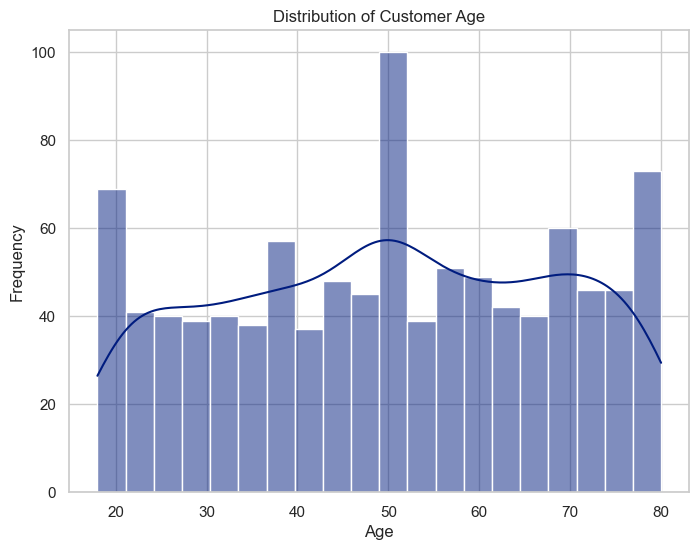

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set(style="whitegrid", palette="dark")

# Histogram for customer age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

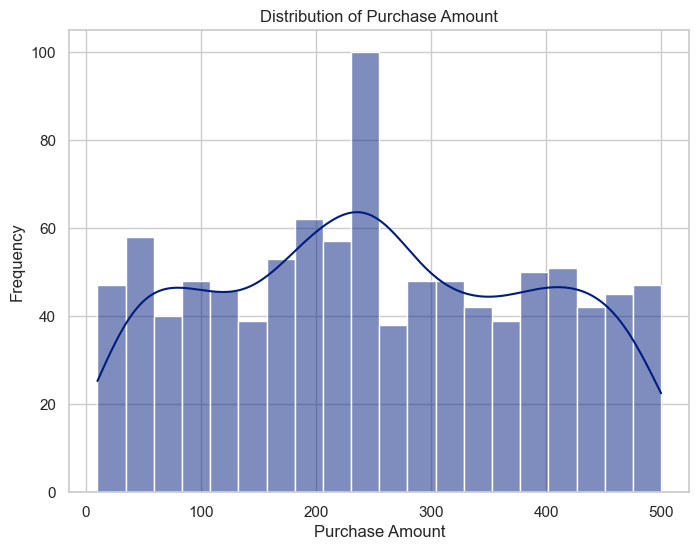

In [146]:
# Histogram for purchase amount
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase_Amount'], bins=20, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

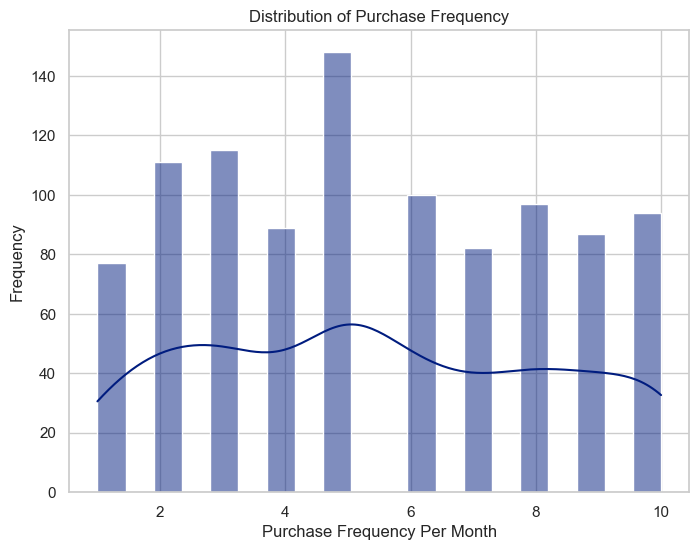

In [148]:
# Histogram for purchase frequency
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase_Frequency_Per_Month'], bins=20, kde=True)
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.show()

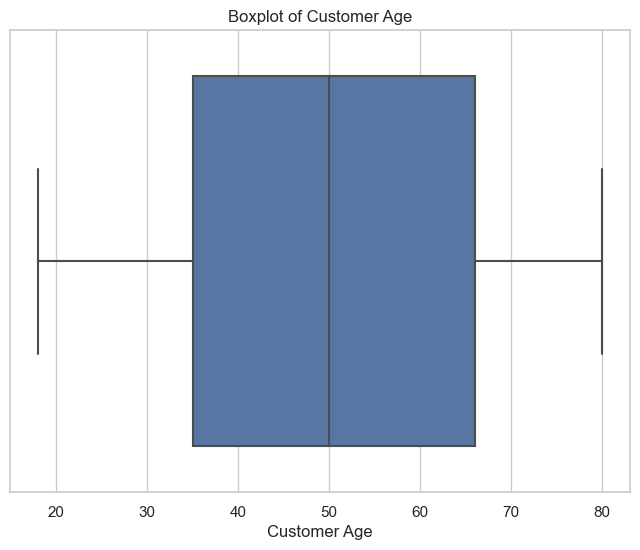

In [149]:
# Set the style and color palette
sns.set(style="whitegrid", palette="deep")

# Boxplot for customer age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Customer Age')
plt.xlabel('Customer Age')
plt.show()

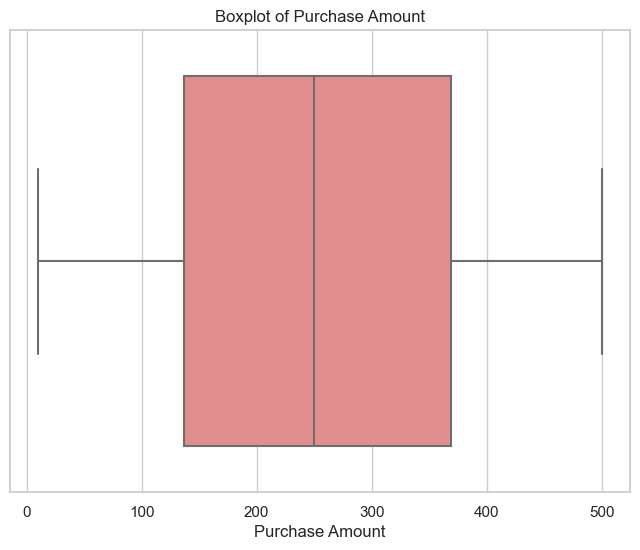

In [150]:
# 2. Boxplot for Purchase Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase_Amount'], color='lightcoral')
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

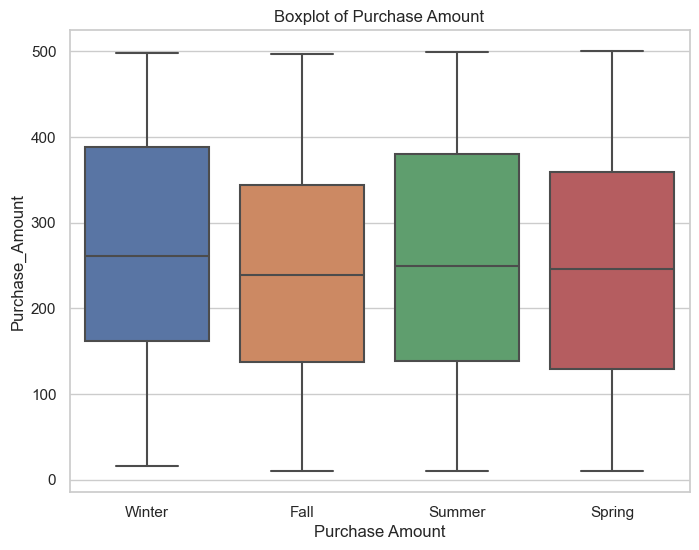

In [151]:
# Boxplot for purchase amount wrt seasons
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Purchase_Amount', data=df)
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

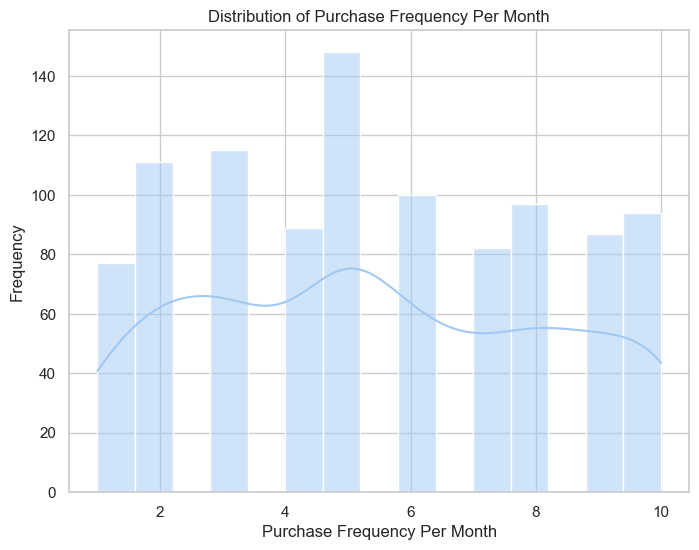

In [158]:
# 3. Histogram for Purchase Frequency Per Month
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase_Frequency_Per_Month'], bins=15, kde=True)
plt.title('Distribution of Purchase Frequency Per Month')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.show()

In [161]:
import pandas as pd
import plotly.express as px




age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']


df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


age_group_stats = df.groupby('Age_Group').agg({
    'Purchase_Amount': 'sum',
    'Average_Spending_Per_Purchase': 'mean',
    'Purchase_Frequency_Per_Month': 'sum'
}).reset_index()



plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")
fig = px.bar(age_group_stats, x='Age_Group', y='Purchase_Amount', title='Total Purchase Amount by Age Group')
fig.show()


<Figure size 800x600 with 0 Axes>

# module 2 part 2

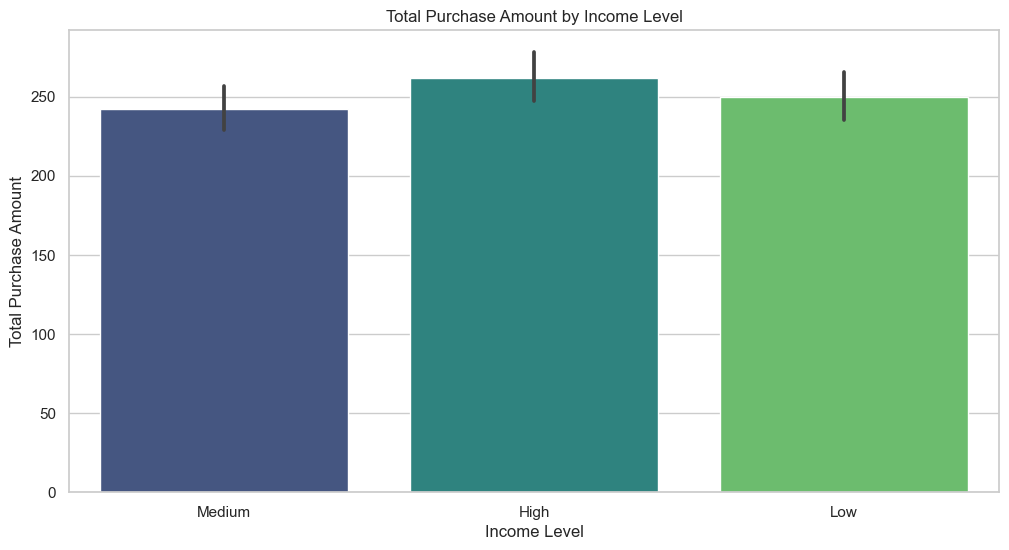

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Level', y='Purchase_Amount', data=df, palette='viridis')
plt.title('Total Purchase Amount by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Total Purchase Amount')
plt.show()


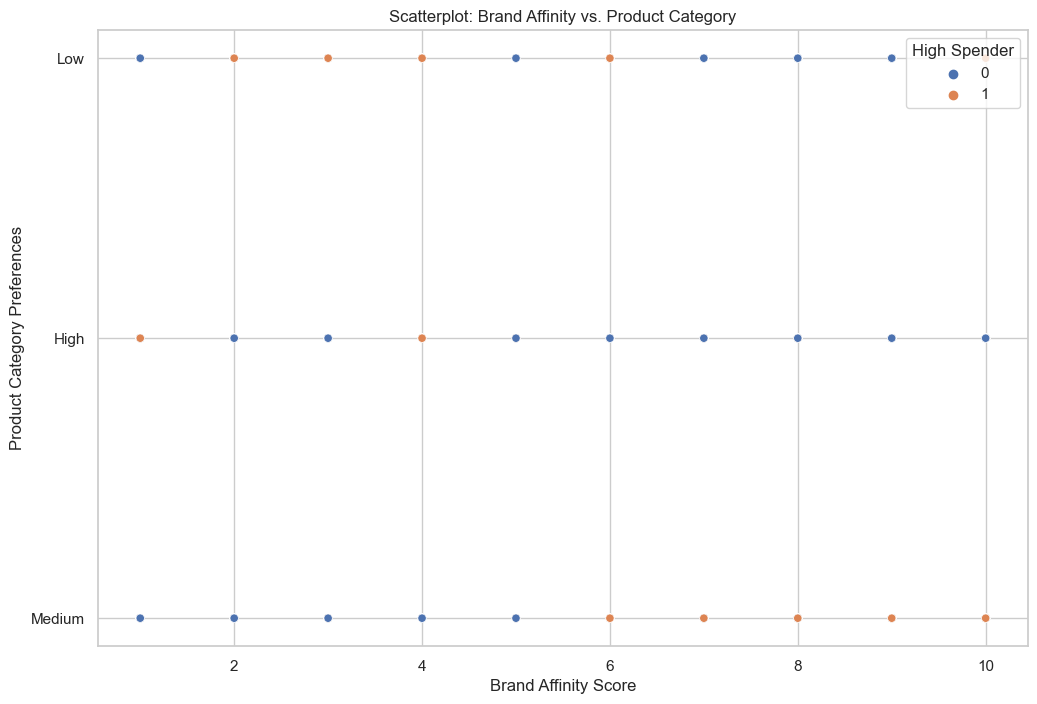

In [162]:
# 2. Scatterplot: Brand Affinity vs. Product Category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Brand_Affinity_Score', y='Product_Category_Preferences', data=df, hue='High_Spending_Customers', palette='deep')
plt.title('Scatterplot: Brand Affinity vs. Product Category')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category Preferences')
plt.legend(title='High Spender', loc='upper right')
plt.show()


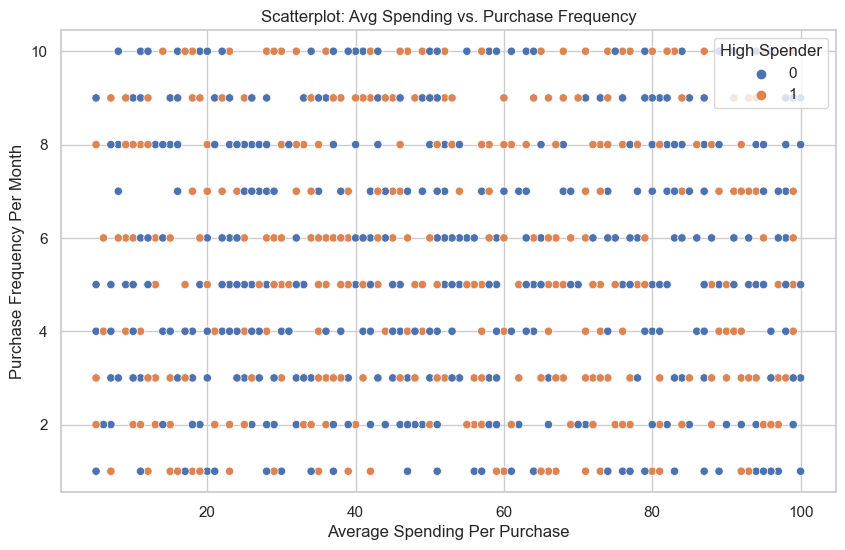

In [164]:
sns.set(style="whitegrid", palette="pastel")

# Scatterplot: Average Spending Per Purchase vs. Purchase Frequency Per Month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Spending_Per_Purchase', y='Purchase_Frequency_Per_Month', data=df, hue='High_Spending_Customers', palette='deep')
plt.title('Scatterplot: Avg Spending vs. Purchase Frequency')
plt.xlabel('Average Spending Per Purchase')
plt.ylabel('Purchase Frequency Per Month')
plt.legend(title='High Spender', loc='upper right')
plt.show()


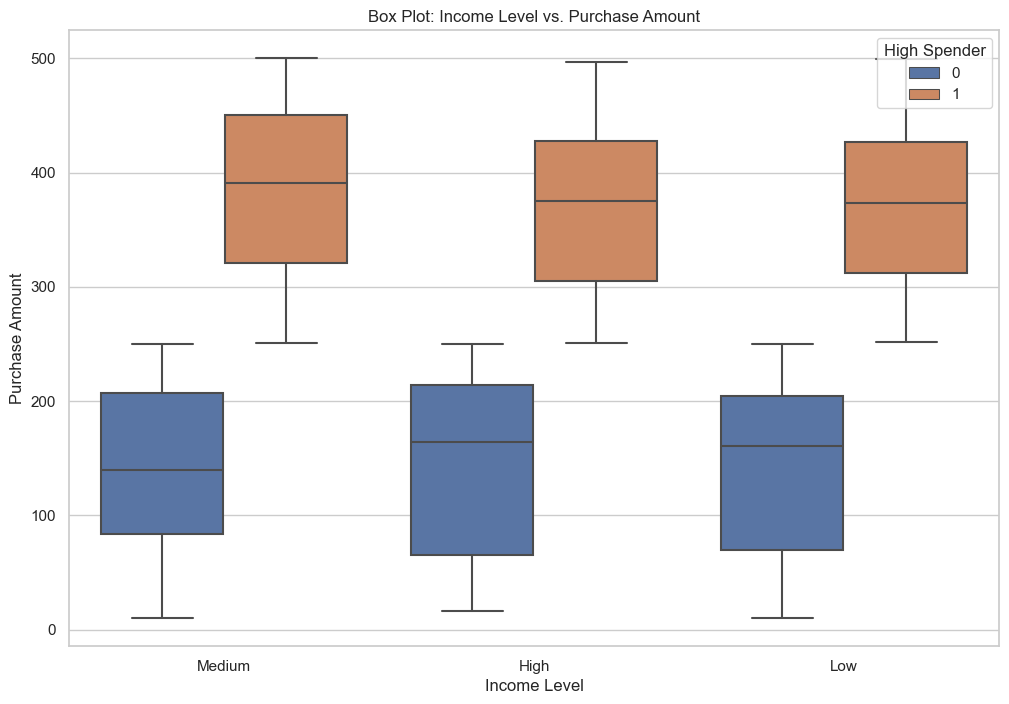

In [188]:
# Box Plot: Income Level vs. Purchase Amount
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Level', y='Purchase_Amount', data=df, hue='High_Spending_Customers', palette='deep')
plt.title('Box Plot: Income Level vs. Purchase Amount')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.legend(title='High Spender', loc='upper right')
plt.show()

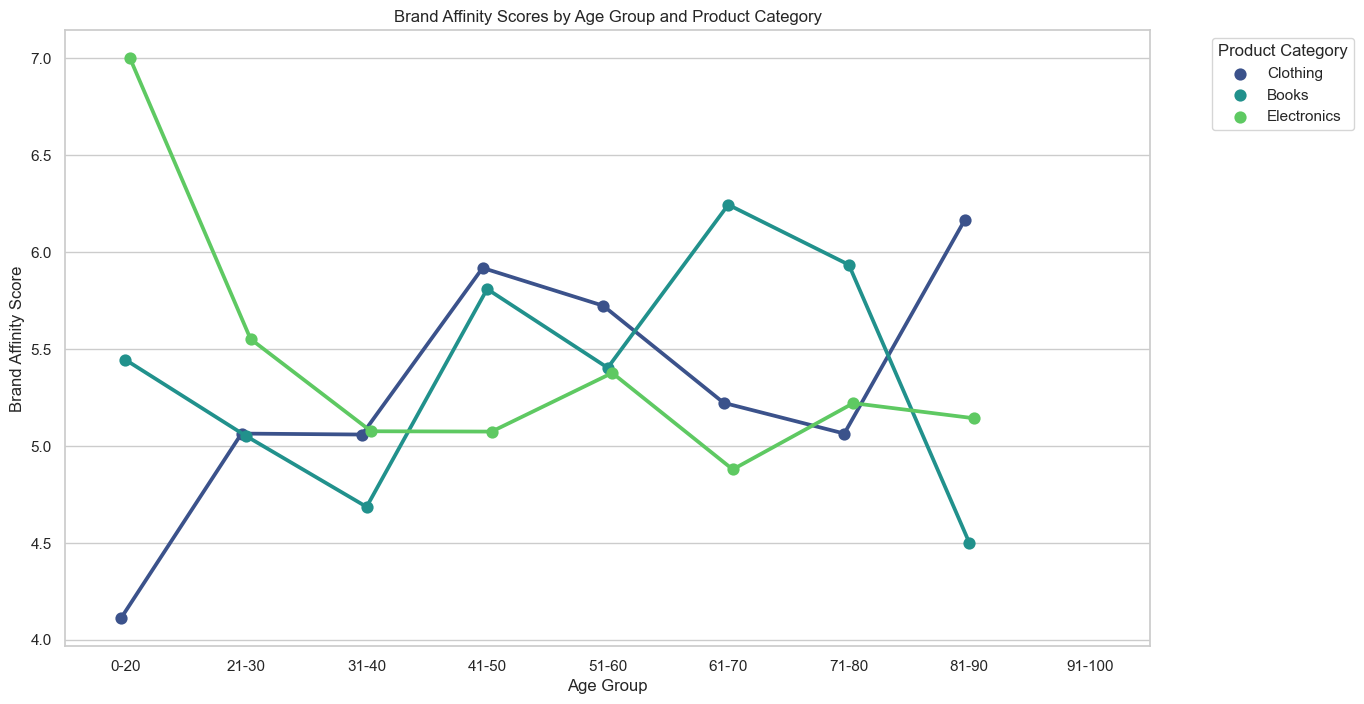

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid", palette="viridis")


plt.figure(figsize=(14, 8))
sns.pointplot(x='Age_Group', y='Brand_Affinity_Score', hue='Product_Category', data=df, palette='viridis', dodge=True, errorbar=None)
plt.title('Brand Affinity Scores by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Brand Affinity Score')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

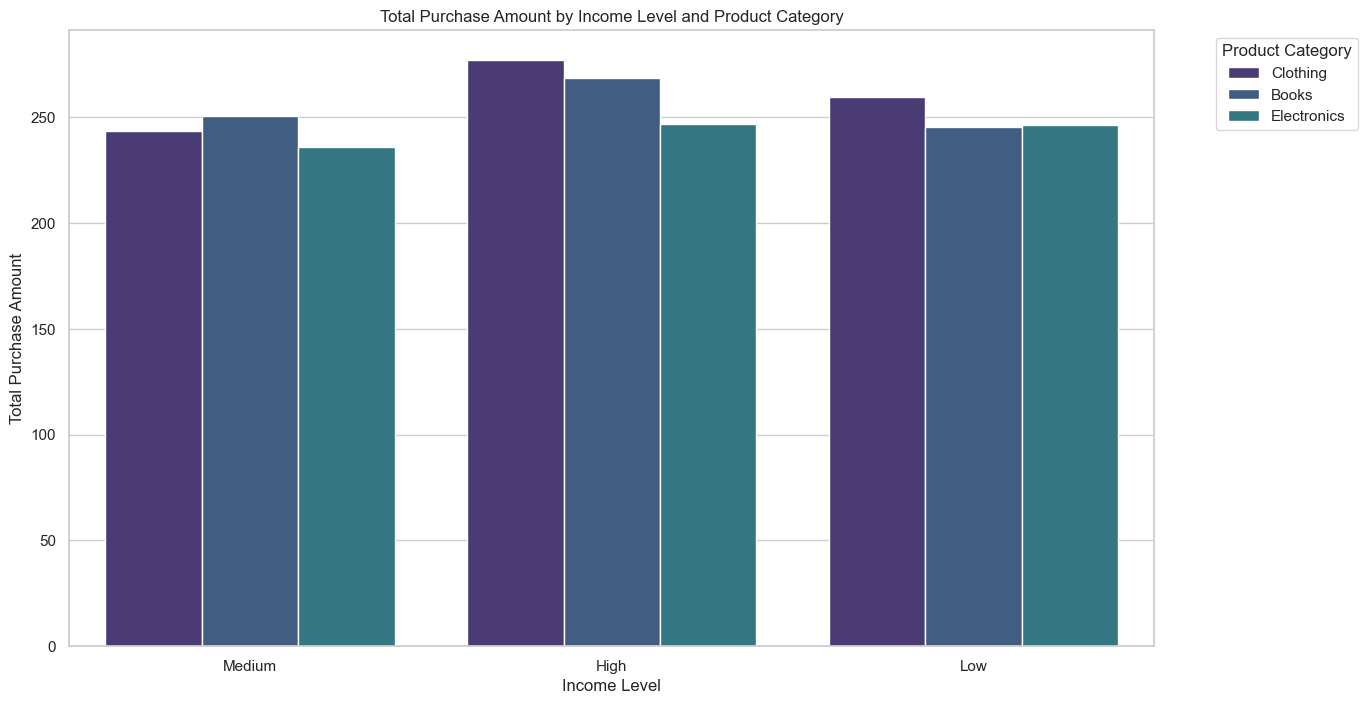

In [172]:
# Set the style and color palette
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(14, 8))
sns.barplot(x='Income_Level', y='Purchase_Amount', hue='Product_Category', data=df, errorbar=None)
plt.title('Total Purchase Amount by Income Level and Product Category')
plt.xlabel('Income Level')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


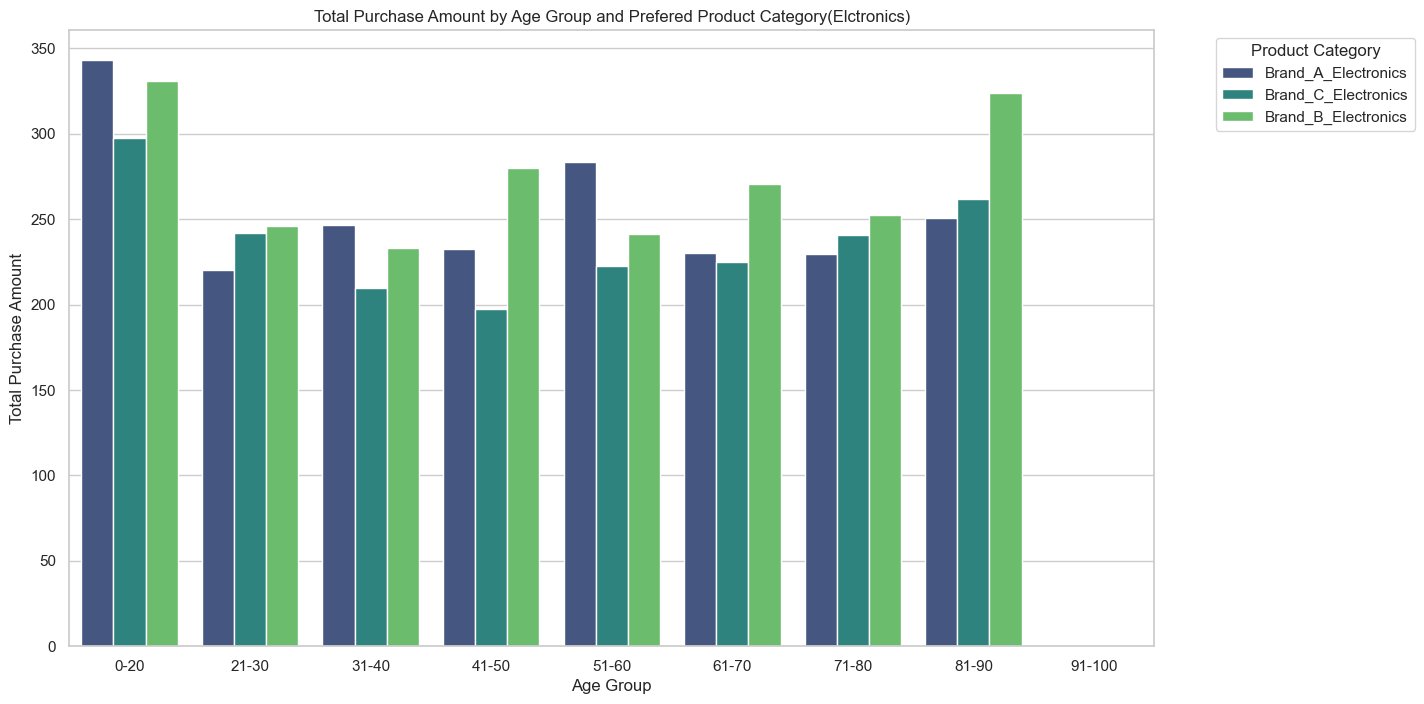

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="viridis")


plt.figure(figsize=(14, 8))
sns.barplot(x='Age_Group', y='Purchase_Amount',data=filtered_df, hue='Preferred_Brand_Category', palette='viridis', errorbar=None)
plt.title('Total Purchase Amount by Age Group and Prefered Product Category(Elctronics)')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


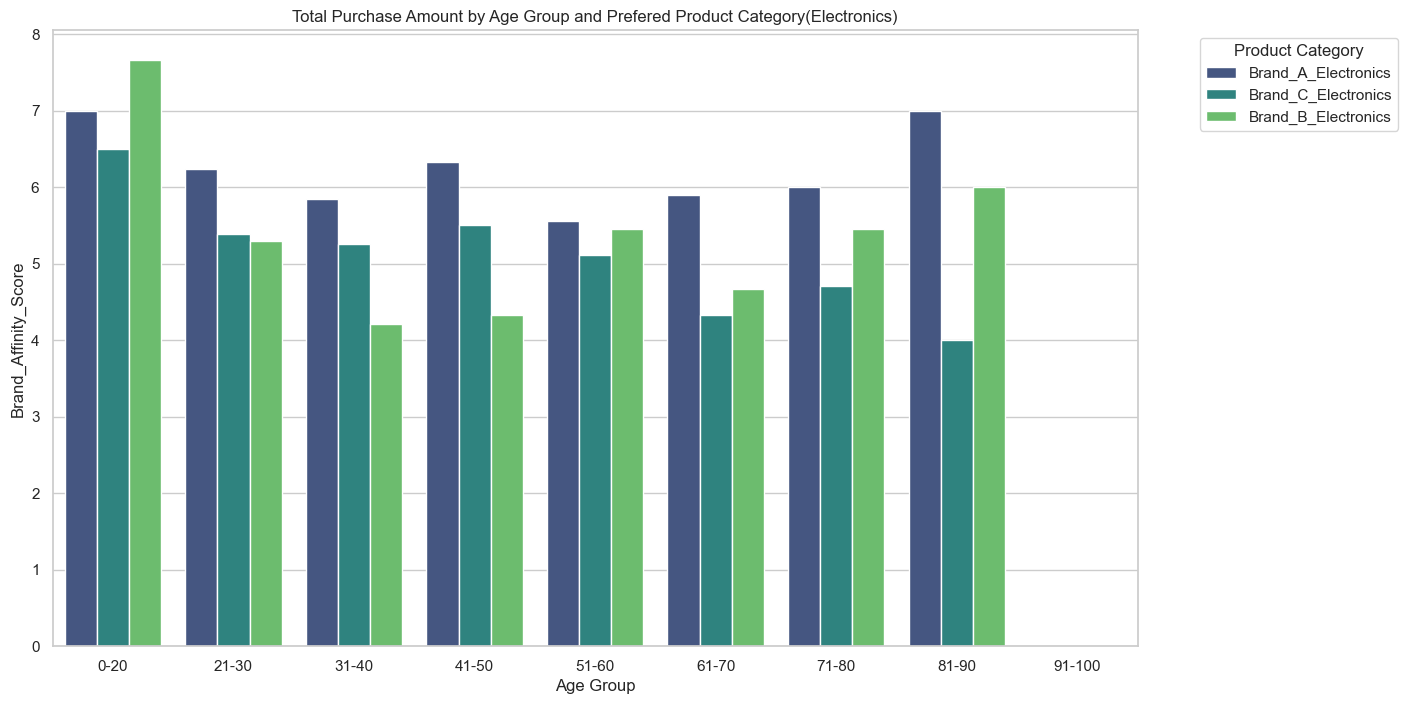

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="viridis")

selected_categories = ['Brand_A_Electronics', 'Brand_B_Electronics', 'Brand_C_Electronics']
filtered_df = df[df['Preferred_Brand_Category'].isin(selected_categories)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Age_Group', y='Brand_Affinity_Score', data=filtered_df, hue='Preferred_Brand_Category', palette='viridis', errorbar=None)
plt.title('Total Purchase Amount by Age Group and Prefered Product Category(Electronics)')
plt.xlabel('Age Group')
plt.ylabel('Brand_Affinity_Score')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


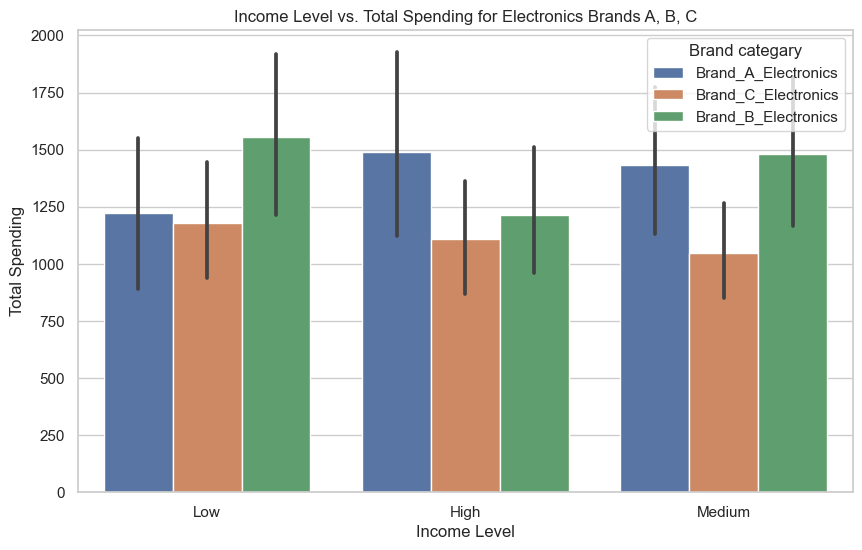

In [170]:
# Bar Plot: Income Level vs. Total Spending
import seaborn as sns
import matplotlib.pyplot as plt

selected_categories = ['Brand_A_Electronics', 'Brand_B_Electronics', 'Brand_C_Electronics']
filtered_df = df[df['Preferred_Brand_Category'].isin(selected_categories)]


plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Level', y='Total_Spending', data=filtered_df, hue='Preferred_Brand_Category', palette='deep')
plt.title('Income Level vs. Total Spending for Electronics Brands A, B, C')
plt.xlabel('Income Level')
plt.ylabel('Total Spending')
plt.legend(title='Brand categary', loc='upper right')
plt.show()


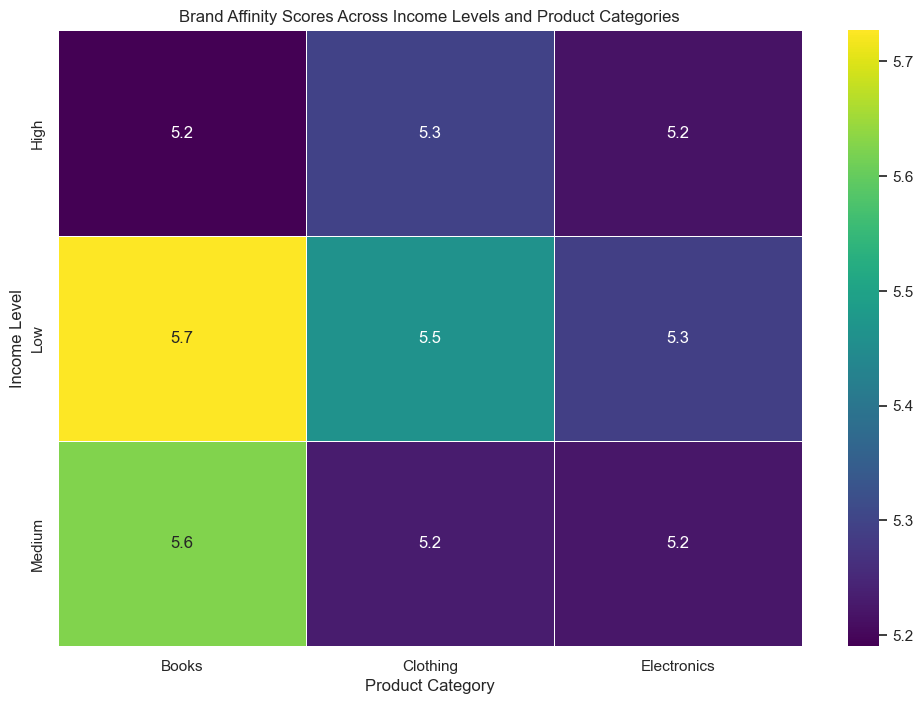

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = df.pivot_table(index='Income_Level', columns='Product_Category', values='Brand_Affinity_Score', aggfunc='mean')


sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('Brand Affinity Scores Across Income Levels and Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Income Level')
plt.show()


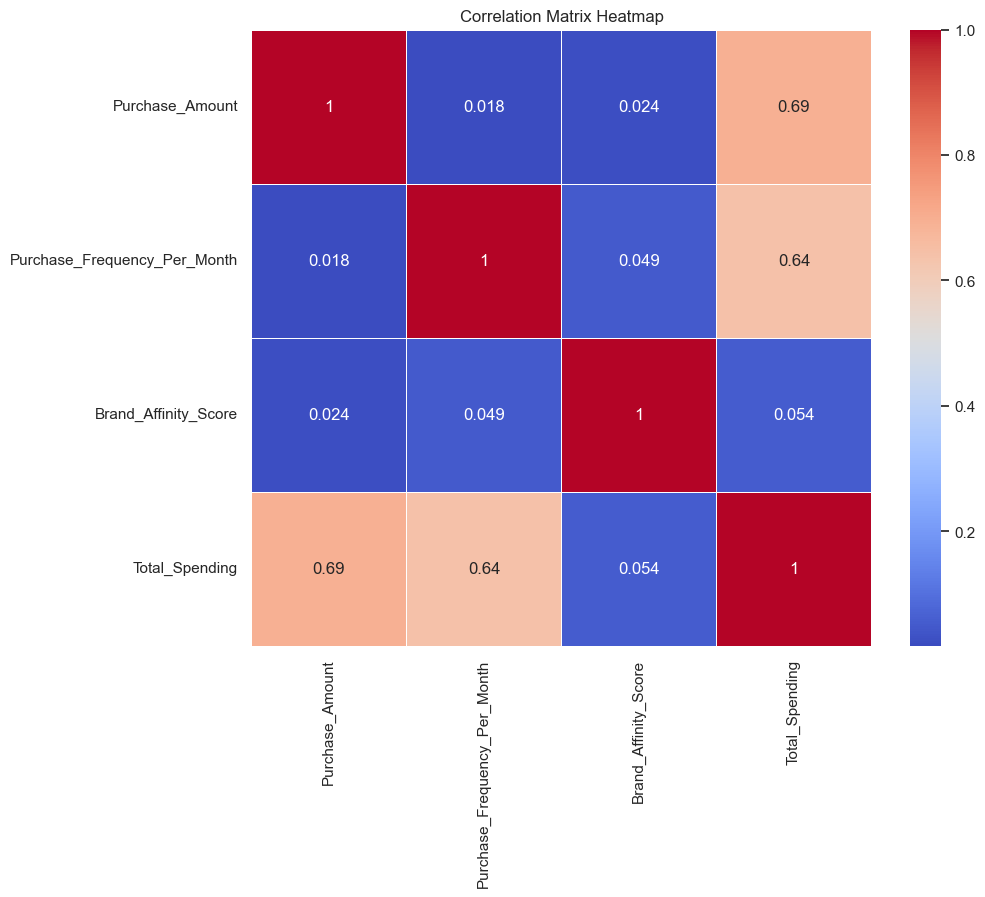

In [190]:
# Heatmap: Correlation Matrix
correlation_matrix = df[['Purchase_Amount', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Total_Spending']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

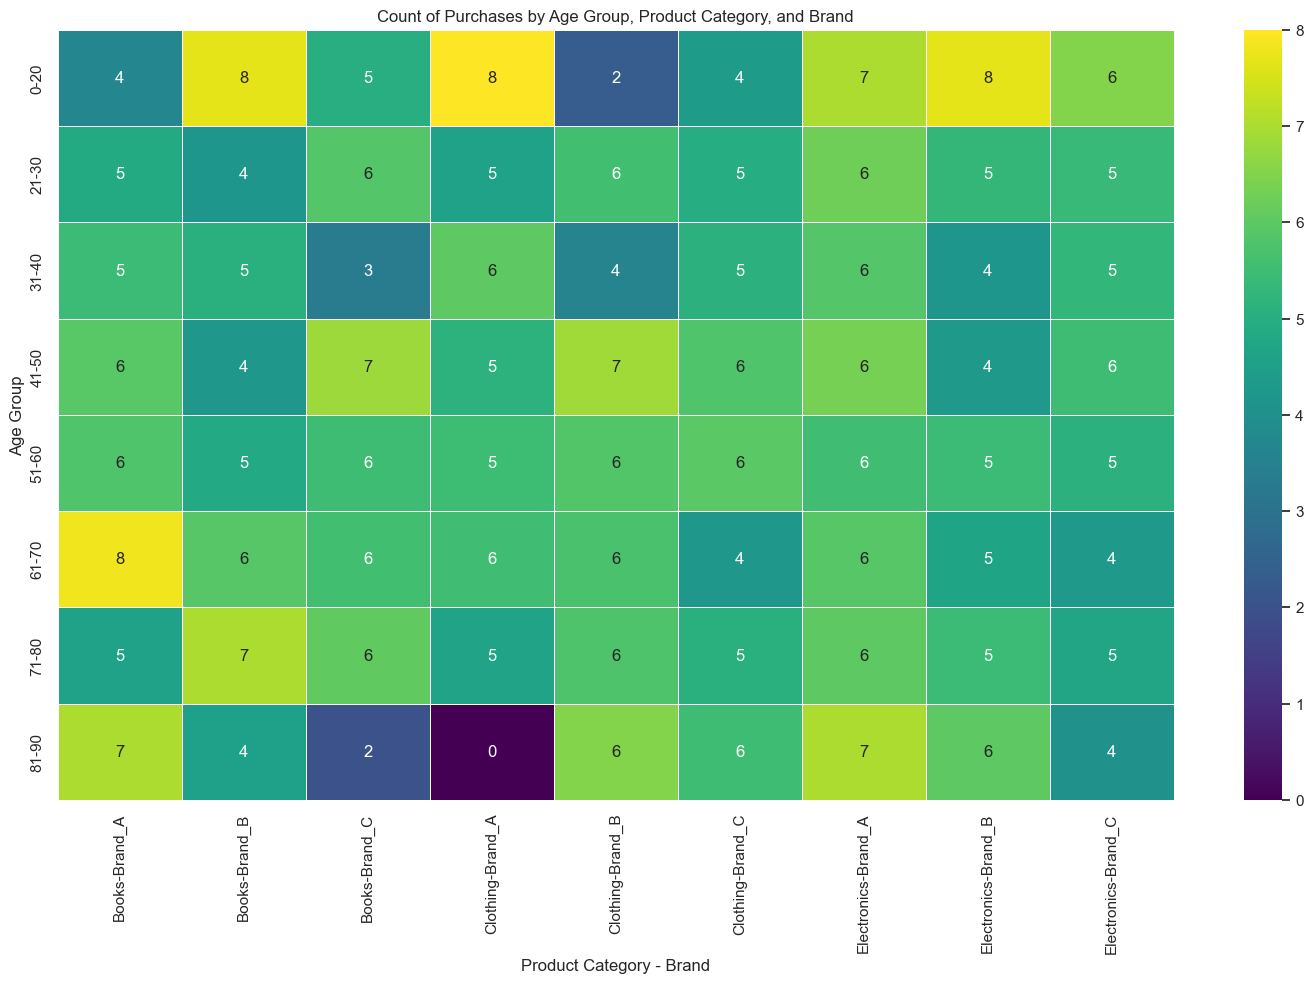

In [107]:

heatmap_data = df.pivot_table(index='Age_Group', columns=['Product_Category', 'Brand'], values='Brand_Affinity_Score', fill_value=0)

sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f", linewidths=.5)
plt.title('Count of Purchases by Age Group, Product Category, and Brand')
plt.xlabel('Product Category - Brand')
plt.ylabel('Age Group')
plt.show()


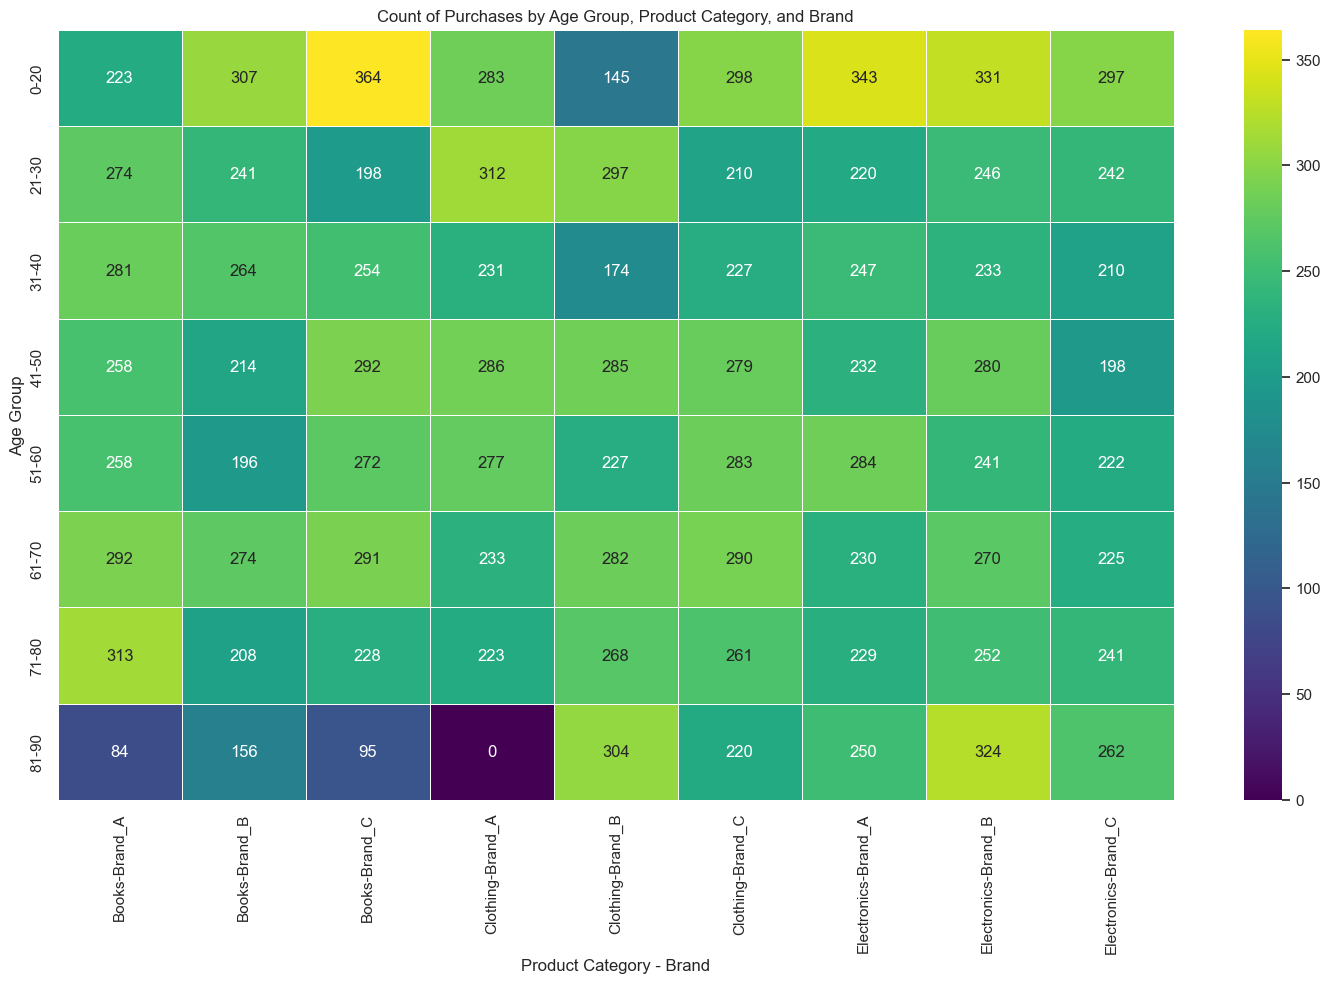

In [108]:

heatmap_data = df.pivot_table(index='Age_Group', columns=['Product_Category', 'Brand'], values='Purchase_Amount', fill_value=0)


sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f", linewidths=.5)
plt.title('Count of Purchases by Age Group, Product Category, and Brand')
plt.xlabel('Product Category - Brand')
plt.ylabel('Age Group')
plt.show()


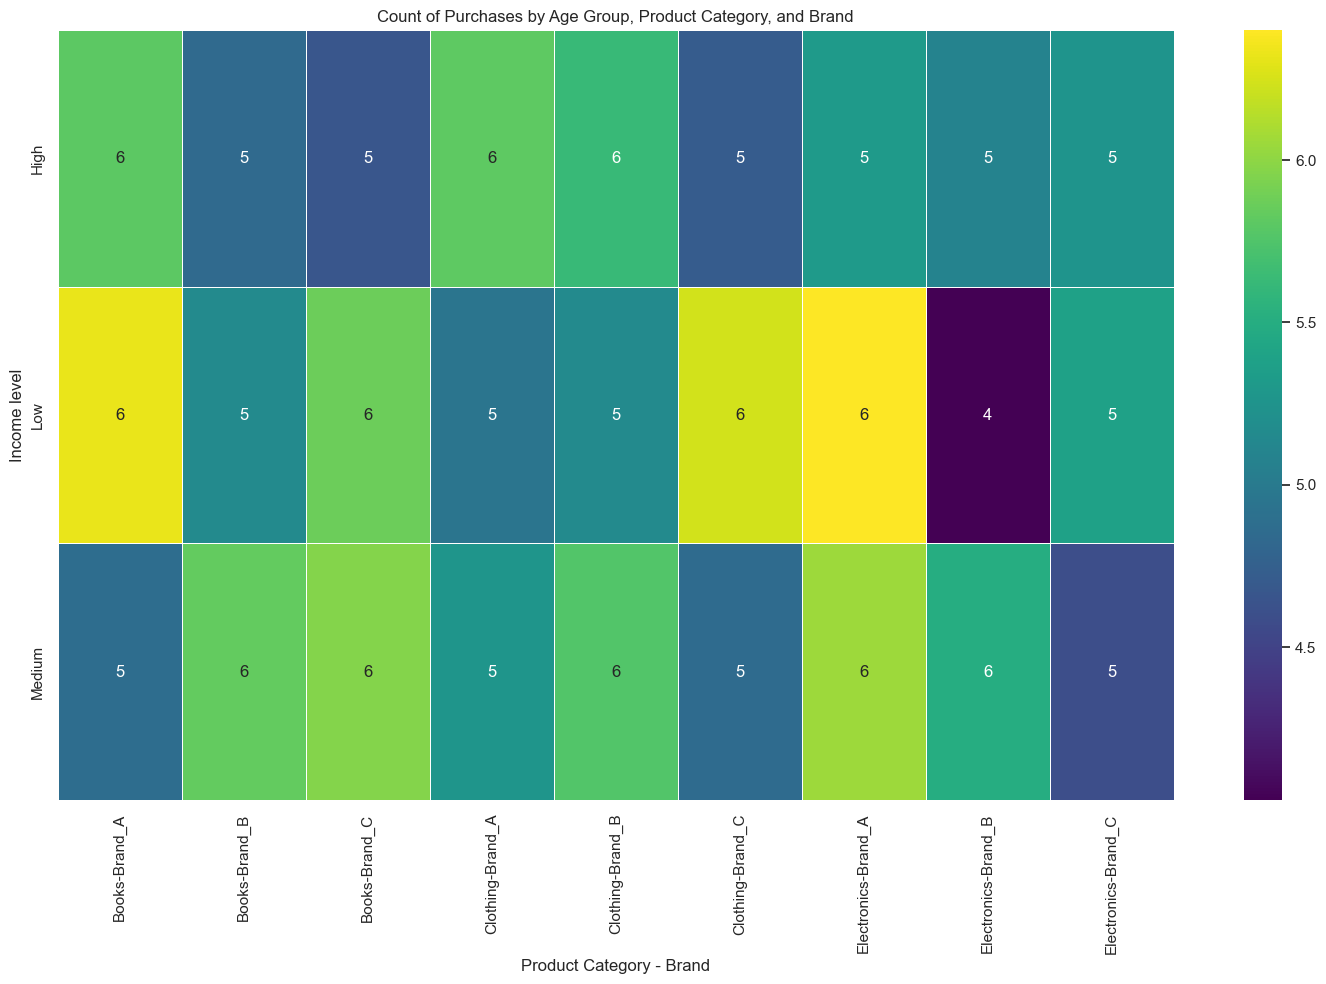

In [109]:

heatmap_data = df.pivot_table(index='Income_Level', columns=['Product_Category', 'Brand'], values='Brand_Affinity_Score', fill_value=0)


sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f", linewidths=.5)
plt.title('Count of Purchases by Age Group, Product Category, and Brand')
plt.xlabel('Product Category - Brand')
plt.ylabel('Income level')
plt.show()


# Part 3

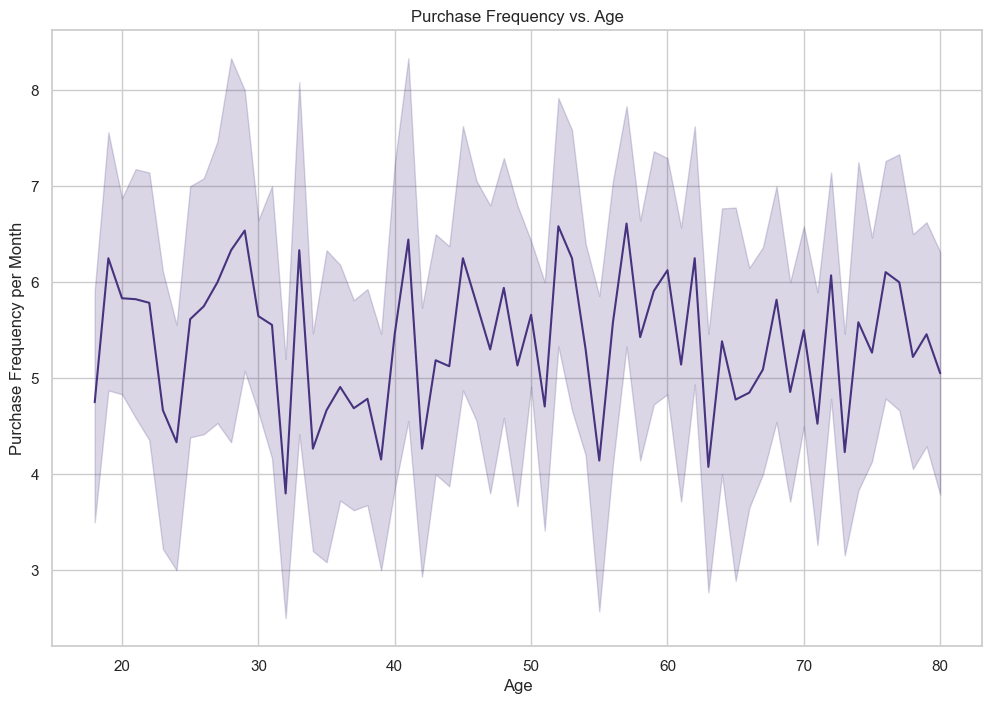

In [110]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Age', y='Purchase_Frequency_Per_Month', data=df)
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency per Month')
plt.show()


In [193]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.month
df['Year'] = df['Purchase_Date'].dt.year


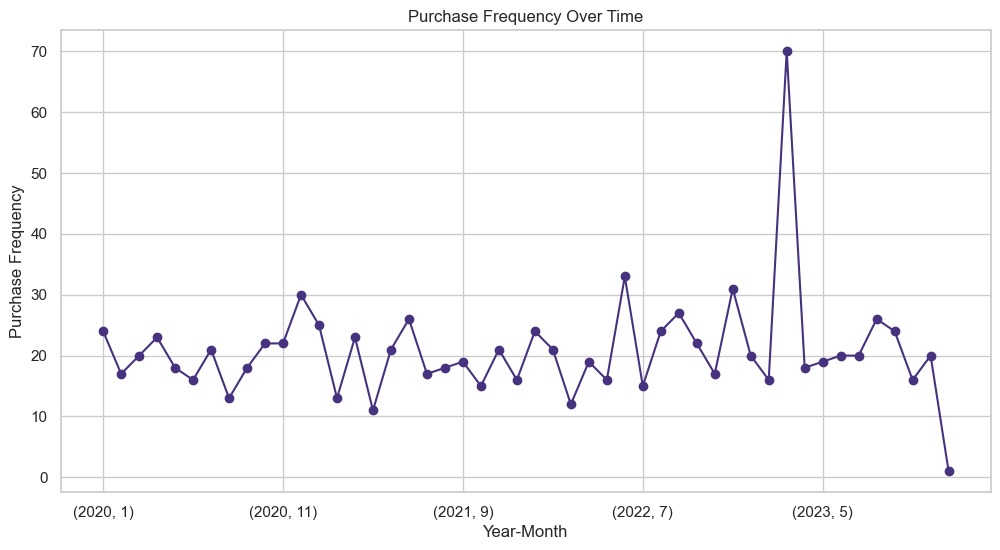

In [194]:
purchase_frequency = df.groupby(['Year', 'Month']).size()

plt.figure(figsize=(12, 6))
purchase_frequency.plot(marker='o')
plt.title('Purchase Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Purchase Frequency')
plt.show()

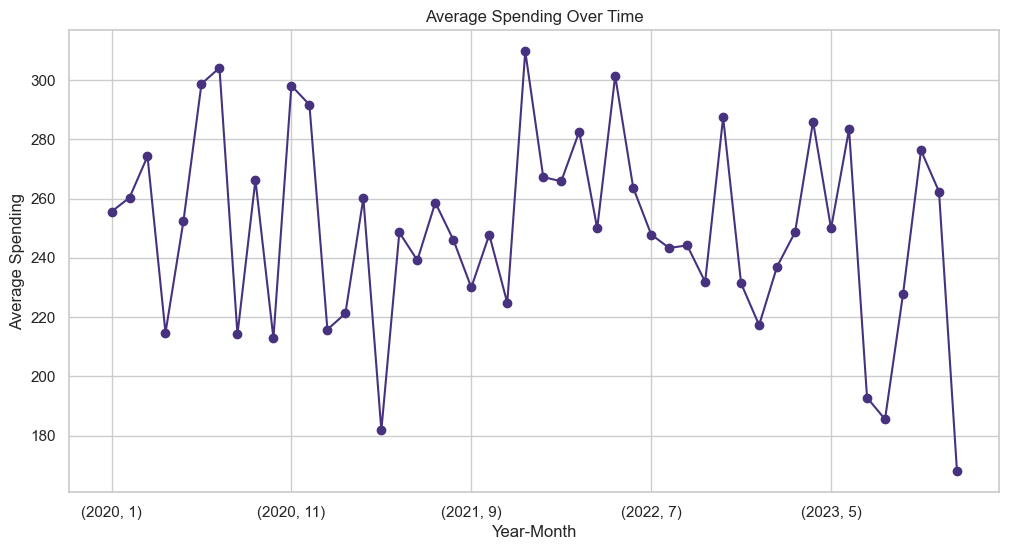

In [114]:

average_spending = df.groupby(['Year', 'Month'])['Purchase_Amount'].mean()

plt.figure(figsize=(12, 6))
average_spending.plot(marker='o')
plt.title('Average Spending Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Spending')
plt.show()


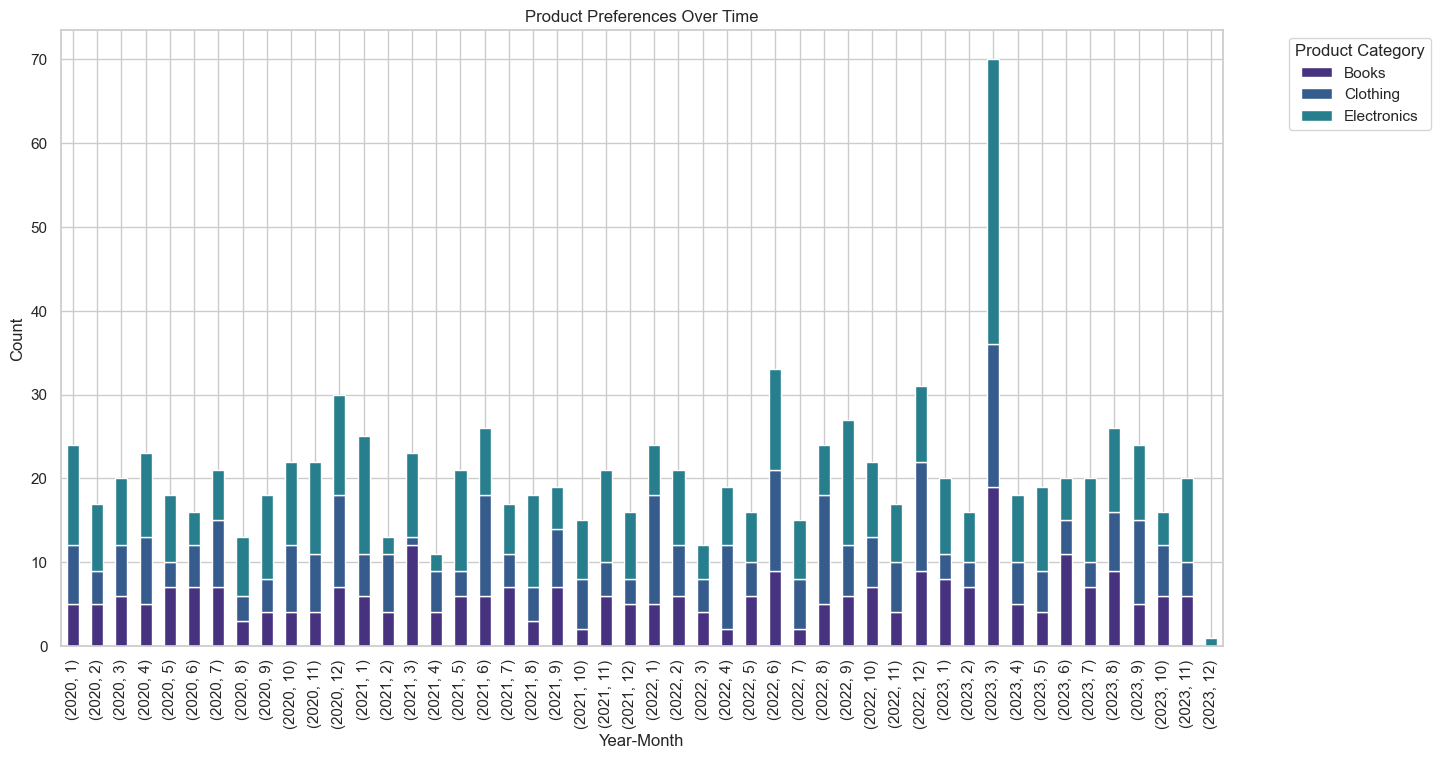

In [206]:
product_preferences = df.groupby(['Year', 'Month', 'Product_Category']).size().unstack()

product_preferences.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Product Preferences Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  

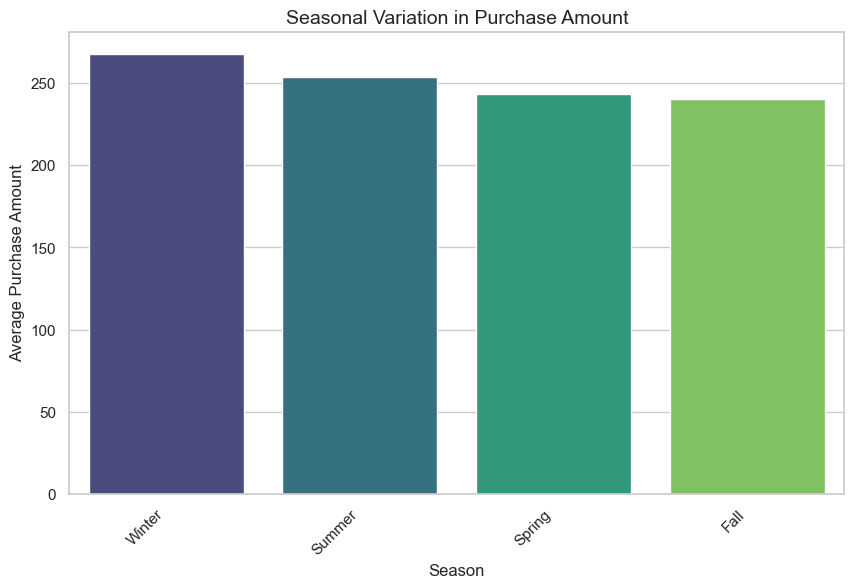

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt


seasonal_variation = df.groupby('Season')['Purchase_Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seasonal_variation.index, y=seasonal_variation.values, palette='viridis')

plt.title('Seasonal Variation in Purchase Amount', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    1000 non-null   object        
 1   Age                            1000 non-null   int32         
 2   Gender                         1000 non-null   object        
 3   Income_Level                   1000 non-null   object        
 4   Address                        1000 non-null   object        
 5   Transaction_ID                 1000 non-null   object        
 6   Purchase_Date                  1000 non-null   datetime64[ns]
 7   Product_ID                     1000 non-null   object        
 8   Product_Category               1000 non-null   object        
 9   Brand                          1000 non-null   object        
 10  Purchase_Amount                1000 non-null   int32         
 11  Average_Spending_P